In [64]:
%matplotlib notebook

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt


In [74]:
train_df = pd.read_csv("data/betas_20000.csv", index_col=0)
label =pd.read_csv("data/label_class.csv", index_col=0)
mylabel=label.x.unique().tolist()
mydata=dict()
for i, label_temp in enumerate(mylabel):
    mydata[label_temp]=i
mydata_lable=[mydata[temp] for temp in label.x.tolist()]    
np.array(mydata_lable)

array([ 0,  1,  1, ..., 50, 50, 50])

In [13]:
train_df.shape

(2801, 2000)

In [70]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()
  
  model.add(tf.keras.layers.Dense(units=136, activation='relu', input_shape=( 2000,)))
  
  # # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.2))
  model.add(tf.keras.layers.Dense(units=91, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    

def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    
    for m in list_of_metrics:
        x=hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
        
    plt.legend()

Epoch 1/500
3/3 [==============================] - 0s 65ms/step - loss: 8.1022 - accuracy: 0.0304 - val_loss: 10.8629 - val_accuracy: 0.0250
Epoch 2/500
3/3 [==============================] - 0s 16ms/step - loss: 7.3115 - accuracy: 0.0929 - val_loss: 4.8613 - val_accuracy: 0.0838
Epoch 3/500
3/3 [==============================] - 0s 16ms/step - loss: 3.8796 - accuracy: 0.2045 - val_loss: 4.1189 - val_accuracy: 0.1301
Epoch 4/500
3/3 [==============================] - 0s 19ms/step - loss: 3.2068 - accuracy: 0.2509 - val_loss: 4.2306 - val_accuracy: 0.1301
Epoch 5/500
3/3 [==============================] - 0s 15ms/step - loss: 2.9522 - accuracy: 0.2875 - val_loss: 4.0535 - val_accuracy: 0.1854
Epoch 6/500
3/3 [==============================] - 0s 15ms/step - loss: 2.6109 - accuracy: 0.3545 - val_loss: 3.9284 - val_accuracy: 0.2282
Epoch 7/500
3/3 [==============================] - 1s 509ms/step - loss: 2.3519 - accuracy: 0.3920 - val_loss: 3.8262 - val_accuracy: 0.2317
Epoch 8/500
3/3 [=

3/3 [==============================] - 0s 15ms/step - loss: 0.3606 - accuracy: 0.8830 - val_loss: 2.7506 - val_accuracy: 0.7986
Epoch 60/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3203 - accuracy: 0.9027 - val_loss: 2.7527 - val_accuracy: 0.7861
Epoch 61/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3547 - accuracy: 0.8920 - val_loss: 2.7845 - val_accuracy: 0.7754
Epoch 62/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3467 - accuracy: 0.8915 - val_loss: 2.8740 - val_accuracy: 0.7736
Epoch 63/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3388 - accuracy: 0.8884 - val_loss: 2.7419 - val_accuracy: 0.7736
Epoch 64/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3352 - accuracy: 0.8973 - val_loss: 2.7673 - val_accuracy: 0.7950
Epoch 65/500
3/3 [==============================] - 0s 15ms/step - loss: 0.3243 - accuracy: 0.8973 - val_loss: 2.8504 - val_accuracy: 0.7718
Epoch 66/500
3/3 [========

3/3 [==============================] - 0s 18ms/step - loss: 0.1994 - accuracy: 0.9402 - val_loss: 3.0726 - val_accuracy: 0.8200
Epoch 118/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1901 - accuracy: 0.9455 - val_loss: 3.0537 - val_accuracy: 0.8093
Epoch 119/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1750 - accuracy: 0.9487 - val_loss: 3.0673 - val_accuracy: 0.8271
Epoch 120/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1936 - accuracy: 0.9353 - val_loss: 3.0625 - val_accuracy: 0.8111
Epoch 121/500
3/3 [==============================] - 0s 149ms/step - loss: 0.1665 - accuracy: 0.9482 - val_loss: 3.1008 - val_accuracy: 0.8004
Epoch 122/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1895 - accuracy: 0.9335 - val_loss: 3.1380 - val_accuracy: 0.8200
Epoch 123/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1767 - accuracy: 0.9451 - val_loss: 3.1362 - val_accuracy: 0.7914
Epoch 124/500
3/3 [

Epoch 175/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1604 - accuracy: 0.9504 - val_loss: 3.1547 - val_accuracy: 0.8217
Epoch 176/500
3/3 [==============================] - 0s 17ms/step - loss: 0.1324 - accuracy: 0.9589 - val_loss: 3.3192 - val_accuracy: 0.8128
Epoch 177/500
3/3 [==============================] - 0s 16ms/step - loss: 0.1633 - accuracy: 0.9487 - val_loss: 3.1716 - val_accuracy: 0.8146
Epoch 178/500
3/3 [==============================] - 0s 16ms/step - loss: 0.1290 - accuracy: 0.9576 - val_loss: 3.1262 - val_accuracy: 0.8182
Epoch 179/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1627 - accuracy: 0.9500 - val_loss: 3.1685 - val_accuracy: 0.8271
Epoch 180/500
3/3 [==============================] - 0s 18ms/step - loss: 0.1388 - accuracy: 0.9545 - val_loss: 3.2582 - val_accuracy: 0.8307
Epoch 181/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1535 - accuracy: 0.9500 - val_loss: 3.3198 - val_accuracy: 0.8324
Epoch 

Epoch 233/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1235 - accuracy: 0.9563 - val_loss: 3.2361 - val_accuracy: 0.8182
Epoch 234/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1398 - accuracy: 0.9563 - val_loss: 3.1242 - val_accuracy: 0.8128
Epoch 235/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1236 - accuracy: 0.9580 - val_loss: 3.1575 - val_accuracy: 0.8289
Epoch 236/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1406 - accuracy: 0.9558 - val_loss: 3.2175 - val_accuracy: 0.8164
Epoch 237/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1277 - accuracy: 0.9603 - val_loss: 3.3241 - val_accuracy: 0.8182
Epoch 238/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1246 - accuracy: 0.9589 - val_loss: 3.2664 - val_accuracy: 0.8414
Epoch 239/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1213 - accuracy: 0.9585 - val_loss: 3.3026 - val_accuracy: 0.7968
Epoch 

Epoch 291/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1078 - accuracy: 0.9607 - val_loss: 3.7470 - val_accuracy: 0.8360
Epoch 292/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 3.6461 - val_accuracy: 0.8146
Epoch 293/500
3/3 [==============================] - 0s 17ms/step - loss: 0.1050 - accuracy: 0.9629 - val_loss: 3.6083 - val_accuracy: 0.8217
Epoch 294/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0996 - accuracy: 0.9696 - val_loss: 3.6849 - val_accuracy: 0.8289
Epoch 295/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1101 - accuracy: 0.9621 - val_loss: 3.7585 - val_accuracy: 0.8200
Epoch 296/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0865 - accuracy: 0.9719 - val_loss: 3.7206 - val_accuracy: 0.8111
Epoch 297/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0894 - accuracy: 0.9728 - val_loss: 3.6203 - val_accuracy: 0.8307
Epoch 

Epoch 349/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0973 - accuracy: 0.9696 - val_loss: 3.8088 - val_accuracy: 0.8111
Epoch 350/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1083 - accuracy: 0.9643 - val_loss: 3.6089 - val_accuracy: 0.8182
Epoch 351/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0898 - accuracy: 0.9741 - val_loss: 3.7778 - val_accuracy: 0.8235
Epoch 352/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0803 - accuracy: 0.9732 - val_loss: 4.0751 - val_accuracy: 0.8235
Epoch 353/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0861 - accuracy: 0.9701 - val_loss: 4.0391 - val_accuracy: 0.8164
Epoch 354/500
3/3 [==============================] - 0s 17ms/step - loss: 0.1004 - accuracy: 0.9705 - val_loss: 3.7999 - val_accuracy: 0.8271
Epoch 355/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0769 - accuracy: 0.9768 - val_loss: 3.6874 - val_accuracy: 0.8307
Epoch 

Epoch 407/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0885 - accuracy: 0.9728 - val_loss: 3.9439 - val_accuracy: 0.8093
Epoch 408/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0911 - accuracy: 0.9692 - val_loss: 3.9549 - val_accuracy: 0.8057
Epoch 409/500
3/3 [==============================] - 0s 18ms/step - loss: 0.0858 - accuracy: 0.9714 - val_loss: 3.9672 - val_accuracy: 0.8093
Epoch 410/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0927 - accuracy: 0.9683 - val_loss: 4.0103 - val_accuracy: 0.8146
Epoch 411/500
3/3 [==============================] - 0s 16ms/step - loss: 0.1115 - accuracy: 0.9558 - val_loss: 3.8561 - val_accuracy: 0.8128
Epoch 412/500
3/3 [==============================] - 0s 20ms/step - loss: 0.0982 - accuracy: 0.9705 - val_loss: 3.9945 - val_accuracy: 0.7932
Epoch 413/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0986 - accuracy: 0.9643 - val_loss: 3.9321 - val_accuracy: 0.7968
Epoch 

Epoch 465/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0939 - accuracy: 0.9705 - val_loss: 3.9372 - val_accuracy: 0.8289
Epoch 466/500
3/3 [==============================] - 0s 15ms/step - loss: 0.1076 - accuracy: 0.9621 - val_loss: 4.1843 - val_accuracy: 0.8253
Epoch 467/500
3/3 [==============================] - 0s 20ms/step - loss: 0.1099 - accuracy: 0.9638 - val_loss: 4.2604 - val_accuracy: 0.8111
Epoch 468/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0842 - accuracy: 0.9723 - val_loss: 3.9724 - val_accuracy: 0.8289
Epoch 469/500
3/3 [==============================] - 0s 16ms/step - loss: 0.0996 - accuracy: 0.9674 - val_loss: 4.0019 - val_accuracy: 0.8111
Epoch 470/500
3/3 [==============================] - 0s 15ms/step - loss: 0.0935 - accuracy: 0.9670 - val_loss: 4.1580 - val_accuracy: 0.8324
Epoch 471/500
3/3 [==============================] - 0s 14ms/step - loss: 0.0842 - accuracy: 0.9719 - val_loss: 4.1938 - val_accuracy: 0.8253
Epoch 

<IPython.core.display.Javascript object>


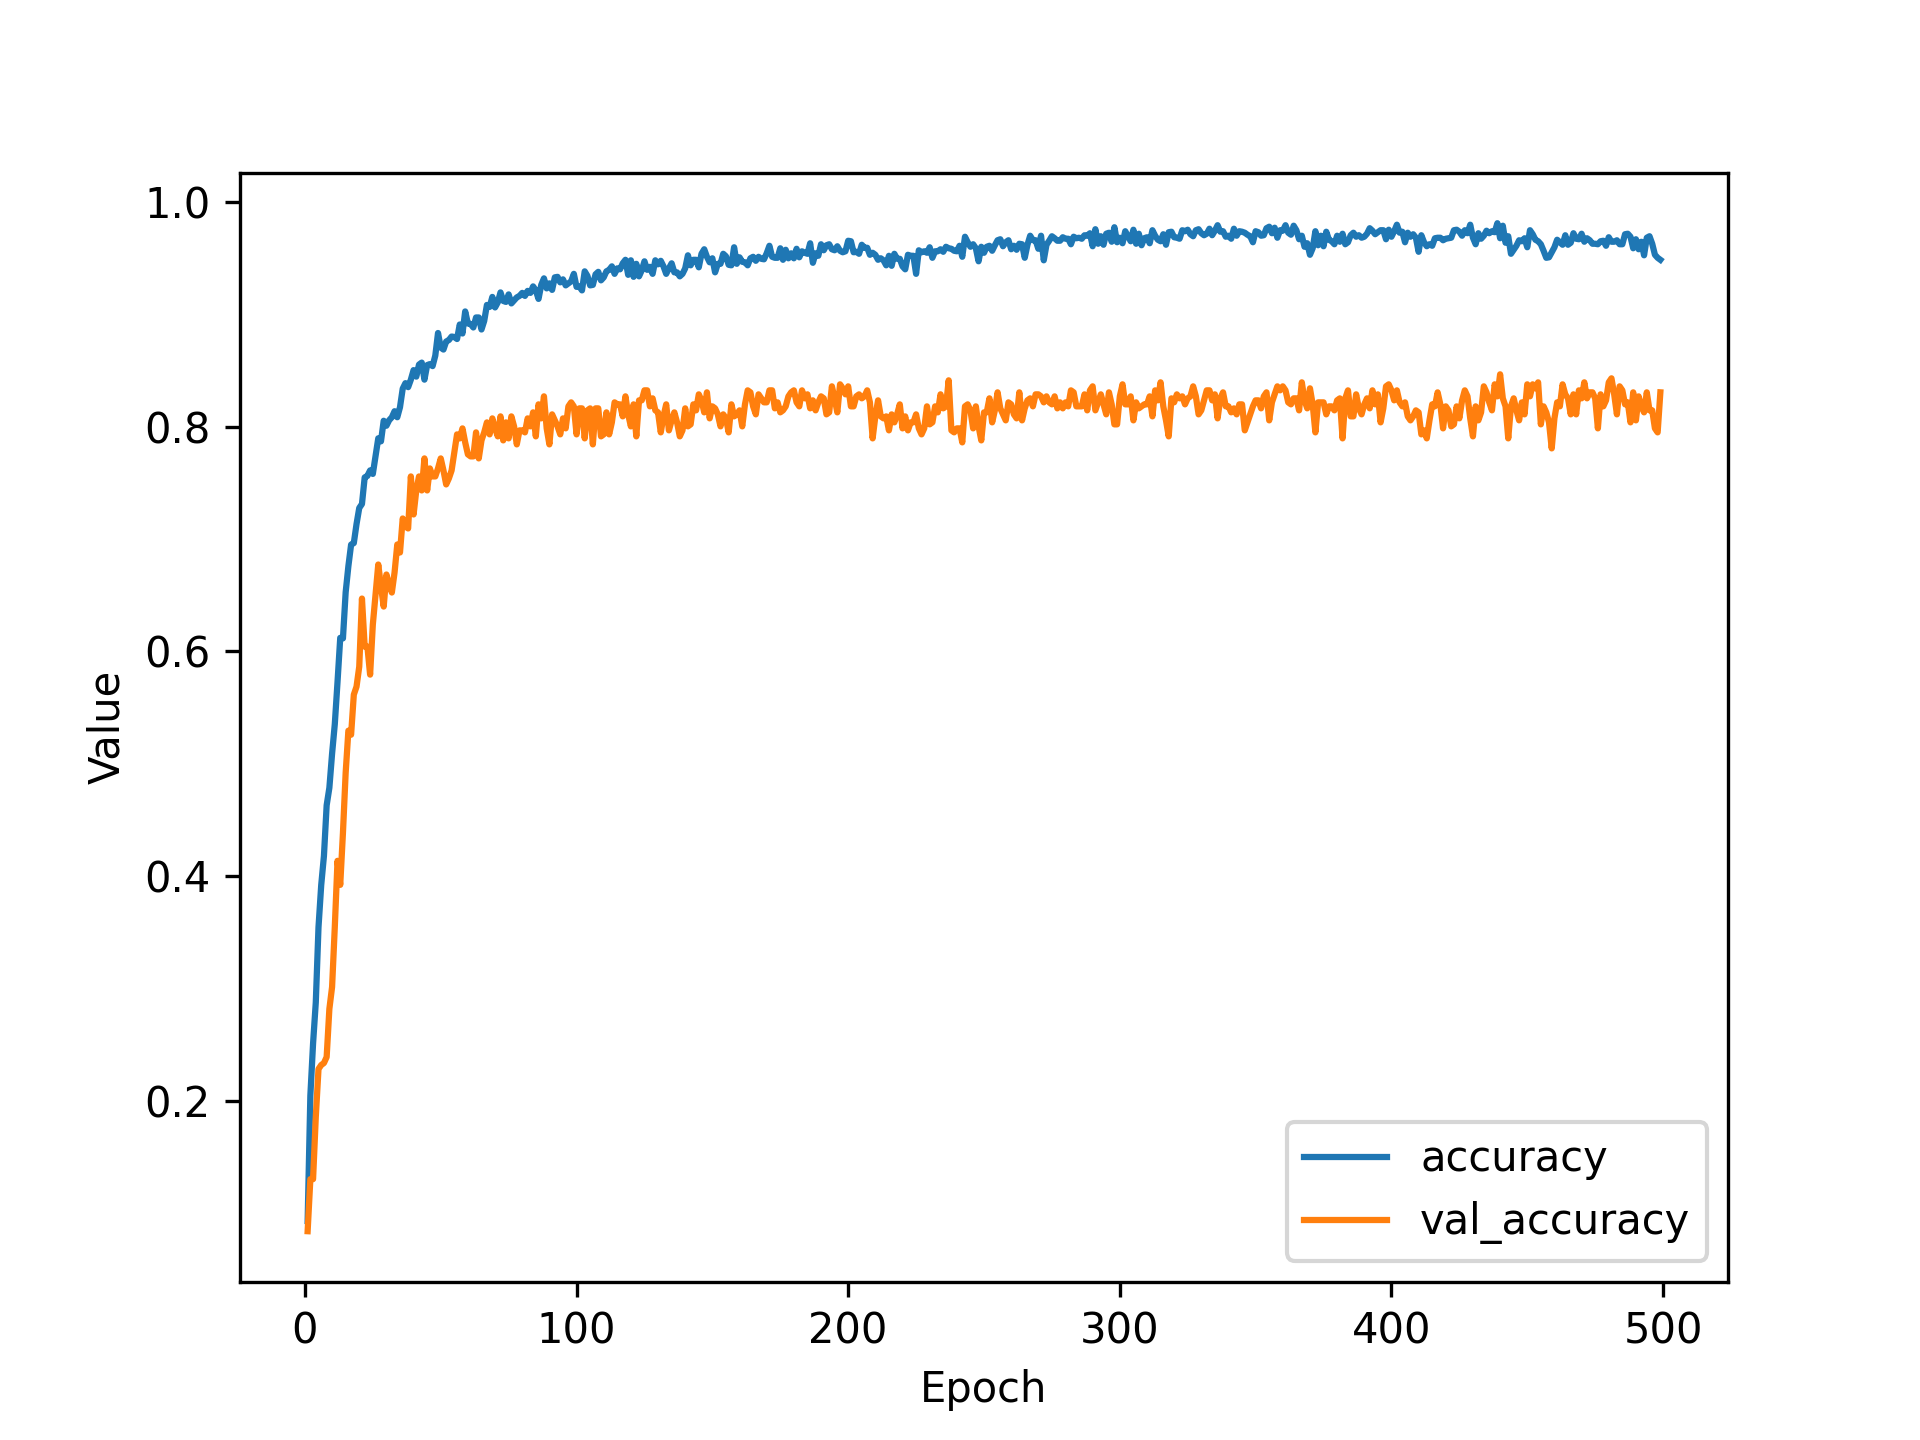

In [71]:
learning_rate = 0.01
epochs = 500
batch_size = 1000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)
# Train the model on the normalized training set.
epochs, hist = train_model(my_model, train_df, np.array(mydata_lable), 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy', 'val_accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)





In [67]:
hist


,loss,accuracy,val_loss,val_accuracy
0,11.004742,0.079911,11.425354,0.149733
1,6.618367,0.195982,5.508847,0.199643
2,3.557698,0.344643,3.907562,0.176471
3,2.740256,0.362946,3.747744,0.258467
4,2.119701,0.490625,3.717331,0.279857
5,1.627006,0.599554,3.453233,0.376114
6,1.215506,0.697768,3.377179,0.393939
7,0.882748,0.788393,3.353643,0.506239
8,0.671532,0.845982,3.494065,0.543672
9,0.502864,0.880357,3.594764,0.586453
